# **MPOX Instagram NLP Project**

## 【**I**】 **Introduction**

- The global Mpox (Monkeypox) outbreak highlighted the significant role that social media plays in shaping public perceptions during health crises. Instagram, a visual-first and widely used platform, became a key space for individuals to express their concerns, share information, or spread misinformation about the disease. Understanding public sentiment and identifying harmful content such as hate speech in this environment is critical for guiding effective communication strategies by public health organizations.

## 【**II**】**Business Understanding**

 - In this project, we aim to leverage Natural Language Processing (NLP) techniques to analyze user-generated Instagram content related to Mpox (formerly known as Monkeypox).

 - We use the '**Mpox Instagram Dataset - Sentiment and Hate Analysis**' to:

    1. Create a model to classify the **sentiment** of posts: neutral,fear,joy,sadness,anger,surprise and disgust.
           
    2. Create a model to detect **hate speech**: Hateful or Non-Hateful.

 - These insights can help health authorities and NGOs better understand public sentiment and monitor online toxicity.

## 【**III**】 **Data Understanding**

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Generate word clouds

In [3]:
# Load dataset
file_path = './data/Dataset.xlsx'
df = pd.read_excel(file_path)
df.head()

Post ID                                   Post description        Date  \
0  CgXDOaQDvGm  “I have decided that the global #monkeypox out...  07/23/2022   
1  CgXpRmMIdzG  In light of the evolving monkeypox outbreak wi...  07/23/2022   
2  CgXMyIjP34S  #LinkInBio | The World Health Organization sai...  07/23/2022   
3  CgXaFGDsevq  If you've been hearing about monkeypox and wan...  07/23/2022   
4  CgX3rATJTXd  Our horrific experience with MONKEYPOX…\n\n#mo...  07/23/2022   

  Language                        Translated Post Description Sentiment  \
0  English  “I have decided that the global #monkeypox out...   neutral   
1  English  In light of the evolving monkeypox outbreak wi...   neutral   
2  English  #LinkInBio | The World Health Organization sai...      fear   
3  English  If you've been hearing about monkeypox and wan...   neutral   
4  English  Our horrific experience with MONKEYPOX…\n\n#mo...      fear   

       Hate           Stress or Anxiety  
0  Not Hate     Stress/Anxiety Detected  
1  Not Hate     Stress/Anxiety Detected  
2  Not Hate     Stress/Anxiety Detected  
3  Not Hate  No Stress/Anxiety Detected  
4  Not Hate     Stress/Anxiety Detected

In [52]:
# Shape of the df
print(df.shape)

# Display basic information about the dataset
print(df.info())

#Value counts for 'Sentiment' Columns
print(df['Sentiment'].value_counts())

#Value counts for 'Hate' Columns
print(df['Hate'].value_counts())

(59299, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59299 entries, 0 to 60126
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Post ID                      59299 non-null  object
 1   Post description             59299 non-null  object
 2   Date                         59299 non-null  object
 3   Language                     59299 non-null  object
 4   Translated Post Description  59299 non-null  object
 5   Sentiment                    59299 non-null  object
 6   Hate                         59299 non-null  object
 7   Stress or Anxiety            59299 non-null  object
 8   language                     59299 non-null  object
 9   clean_text                   59299 non-null  object
 10  text_cleaned                 59299 non-null  object
dtypes: object(11)
memory usage: 7.9+ MB
None
neutral     29801
fear        16741
joy          5194
sadness      3534
anger        1598
su

> **Findings**

The dataset consists of Instagram posts related to Mpox, with the following key features:

- **Translated Post Description**: The main textual feature containing translated descriptions of the posts.
- **Sentiment**: Target variable representing the emotional sentiment of each post, categorized into seven distinct classes: neutral, fear, joy, sadness, anger, surprise, and disgust.
- **Hate**: A binary target variable indicating whether a post contains hate speech.
- **Language**: The original language of the posts, showcasing a multilingual dataset primarily dominated by English.

**Dataset Overview**
- **Total Records**: 59299
- **Total Features**: 8
- **No missing values are present**.

**Key Insights**
- **Class Imbalance**: Notable imbalance in hate speech with 4.25% marked as hateful.
- **Text Length**: Posts vary in length, with an average of 547.27 characters.
- **Multilingual Content**: Over 50 languages represented, with English being the most common at 97%.

## 【**IV**】**Data Preparation**

This section involves filtering, preprocessing, and preparing the dataset for modeling.

In [5]:
# Install required packages
#%pip install langdetect

In [6]:
# Import language detection libraries
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException # Exception raised if Detect fails

# Create a function to detect language(takes a single line of string as input)
def detect_lang(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'error'

# Apply language detection
print('Detecting languages...')
df['language'] = df['Translated Post Description'].apply(detect_lang) # Apply the function to each row in the 'Translated Post Description' column
print(df['language'].value_counts().head(10))

Detecting languages...
en    58606
fi      563
es      130
id      115
fr      100
it       67
af       65
pt       45
no       43
sv       38
Name: language, dtype: int64


| Language Code | Language   | Number of Posts |
| ------------- | ---------- | --------------- |
| `en`          | English    | 58,616          |
| `fi`          | Finnish    | 566             |
| `es`          | Spanish    | 128             |
| `id`          | Indonesian | 113             |
| `fr`          | French     | 98              |
| `it`          | Italian    | 69              |
| `af`          | Afrikaans  | 62              |
| `pt`          | Portuguese | 47              |
| `no`          | Norwegian  | 46              |
| `sv`          | Swedish    | 37              |

Our top language is English which dominates the datset with more than 97% of all posts.For this NLP project we will focus on the top three languages which are:

. **English**(en)

. **Finnish**(fi)

. **Spanish**(es)

In [7]:
# Filter dataset to include only top 3 languages
lang_counts = df['language'].value_counts()
top_langs = lang_counts.head(3).index.tolist()
print('Top 3 languages:', top_langs)
df = df[df['language'].isin(top_langs)]# filters the rows in our dataset, keeping only those where the language is one of the top 3

# Creating a new column clean_text that duplicates the contents of Translated Post Description column
df['clean_text'] = df['Translated Post Description']

#Print the shape of the filtered dataset
print('Filtered dataset shape:', df.shape)

Top 3 languages: ['en', 'fi', 'es']
Filtered dataset shape: (59299, 10)


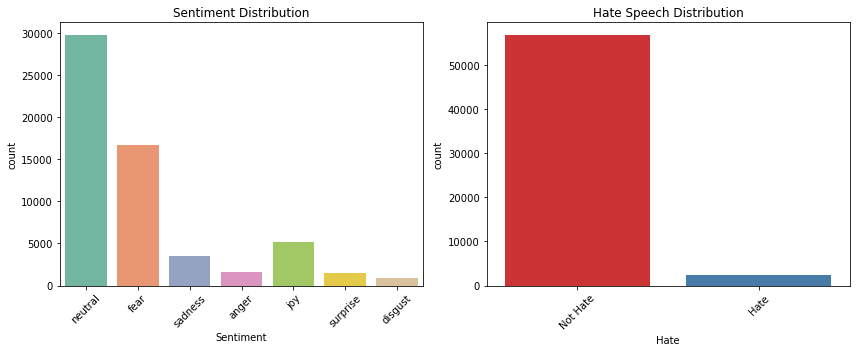

In [8]:
# Visualize label distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Sentiment Distribution
sns.countplot(data=df, x='Sentiment', ax=ax[0], palette='Set2')
ax[0].set_title('Sentiment Distribution')
ax[0].tick_params(axis='x', rotation=45)

# Plot Hate Speech Distribution
sns.countplot(data=df, x='Hate', ax=ax[1], palette='Set1')
ax[1].set_title('Hate Speech Distribution')
ax[1].tick_params(axis='x', rotation=45)

#Adjust Layout and Display Plot
plt.tight_layout()
plt.show()# Show the plots in the notebook

In [ ]:
#%pip install pillow==9.5.0

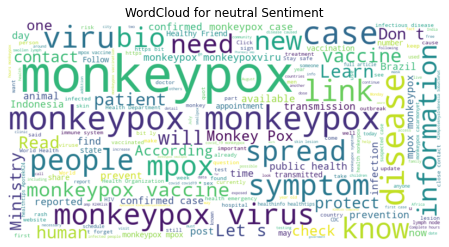

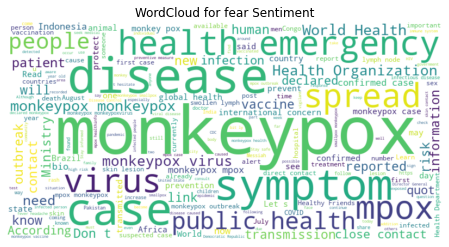

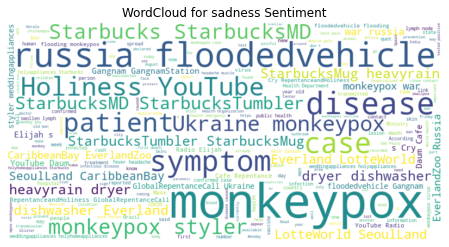

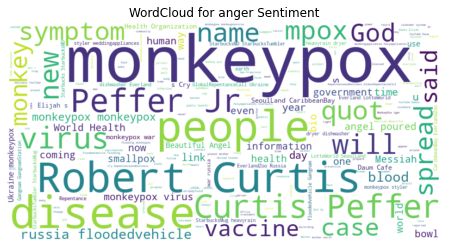

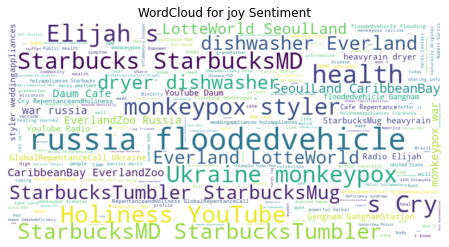

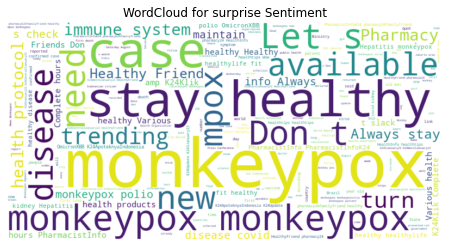

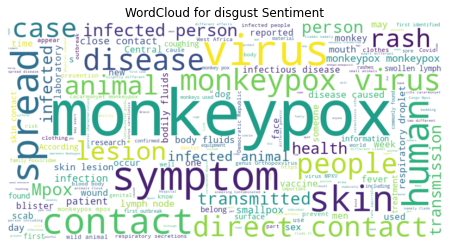

In [10]:
# WordClouds for sentiment categories
for category in df['Sentiment'].unique(): # Loop Through Each Sentiment Category
    text = ' '.join(df[df['Sentiment'] == category]['clean_text']) # Gather All Texts Belonging to That Category
    wc = WordCloud(width=800, height=400, background_color='white').generate(text) # Generate and Display the WordCloud
    plt.figure(figsize=(10, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {category} Sentiment')
    plt.show() # Gives us a visual summary of the most frequent words in each sentiment category

### **Text Pre-processing**

Here we will clean and preprocess the text data for modeling.

In [11]:
# Import required libraries for preprocessing
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Download required NLTK data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))# Converts the stopwords to a set (for faster lookups)

# Define preprocessing function
def preprocess(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['text_cleaned'] = df['clean_text'].apply(preprocess)

# Display sample of processed text
print('Sample of processed text:')
df[['clean_text', 'text_cleaned']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JUDAH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample of processed text:


clean_text  \
0  “I have decided that the global #monkeypox out...   
1  In light of the evolving monkeypox outbreak wi...   
2  #LinkInBio | The World Health Organization sai...   
3  If you've been hearing about monkeypox and wan...   
4  Our horrific experience with MONKEYPOX…\n\n#mo...   

                                        text_cleaned  
0  decided global monkeypox outbreak represents p...  
1  light evolving monkeypox outbreak reported cas...  
2  linkinbio world health organization said expan...  
3  youve hearing monkeypox want learn scroll find...  
4  horrific experience monkeypox monkeypox monkey...

In [16]:
for lang in top_langs:
    df_lang = df[df['language'] == lang]
    print(f'\nLanguage: {lang}')
    print('Sentiment distribution:')
    print(df_lang['Sentiment'].value_counts())
    print('Hate distribution:')
    print(df_lang['Hate'].value_counts())




Language: en
Sentiment distribution:
neutral     29160
fear        16709
joy          5190
sadness      3527
anger        1593
surprise     1529
disgust       898
Name: Sentiment, dtype: int64
Hate distribution:
Not Hate    56123
Hate         2483
Name: Hate, dtype: int64

Language: fi
Sentiment distribution:
neutral    553
anger        3
disgust      3
sadness      2
fear         1
joy          1
Name: Sentiment, dtype: int64
Hate distribution:
Not Hate    552
Hate         11
Name: Hate, dtype: int64

Language: es
Sentiment distribution:
neutral    88
fear       31
sadness     5
joy         3
anger       2
disgust     1
Name: Sentiment, dtype: int64
Hate distribution:
Not Hate    129
Hate          1
Name: Hate, dtype: int64


We initially planned to work with the top three languages in the dataset. However, the other two languages unfortunately do not have enough data—either in terms of sentiment or hate-related content—to support meaningful analysis. As a result, we’ll proceed with only the English language for this NLP project.

### **Train/Test Splitting by Language('en' only)**

Here we split the data for both sentiment and hate speech classification tasks.

In [18]:
# Import necessary library
from collections import defaultdict

# Create dictionary to hold results
language_models = {}
lang_results = defaultdict(dict)

# Focus only on English
lang = 'en'
print(f'Training models for language: {lang}')

# Filter to English data only
df_lang = df[df['language'] == lang].copy()

# Prepare features and labels
X = df_lang['text_cleaned']
y_sentiment = df_lang['Sentiment']
y_hate = df_lang['Hate']

# Check if there are enough samples per class for stratified split
if y_sentiment.value_counts().min() < 2 or y_hate.value_counts().min() < 2:
    print(f'Skipping {lang} — Not enough samples per class for stratification.')
else:
    # Split for sentiment analysis
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
        X, y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment
    )

    # Split for hate speech detection
    X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
        X, y_hate, test_size=0.2, random_state=42, stratify=y_hate
    )

    # Store in lang_results under 'en'
    lang_results[lang]['X_train_s'] = X_train_s
    lang_results[lang]['X_test_s'] = X_test_s
    lang_results[lang]['y_train_s'] = y_train_s
    lang_results[lang]['y_test_s'] = y_test_s
    lang_results[lang]['X_train_h'] = X_train_h
    lang_results[lang]['X_test_h'] = X_test_h
    lang_results[lang]['y_train_h'] = y_train_h
    lang_results[lang]['y_test_h'] = y_test_h

    # Print Summary Info
    print(f'Language - {lang} — Sentiment train size: {len(X_train_s)}, test size: {len(X_test_s)}')
    print(f'Language - {lang} — Hate train size: {len(X_train_h)}, test size: {len(X_test_h)}\n')


Training models for language: en
Language - en — Sentiment train size: 46884, test size: 11722
Language - en — Hate train size: 46884, test size: 11722



## 【**V**】 **Modeling**

 - We will build classification models for both sentiment analysis and hate speech detection using machine learning pipelines combined with GridSearchCV for hyperparameter tuning. The models selected for this project are:

    1. **Logistic Regression** — used for sentiment analysis

    2. **XGBoost** - Used for sentiment analysis

    3. **Random Forest Classifier** — used for hate speech detection

    4. **LightGBM** - used for hate speech detection

 - Each model will be integrated into a pipeline that includes text preprocessing (vectorization), classification, and parameter optimization using grid search to ensure the best possible performance.

In [30]:
# Import required libraries for modeling
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

### **Sentiment Analysis**

#####  【**I**】**Logistic Regression Sentiment Analysis Model with Grid Search**

In [32]:
# Use 'en' for modeling (most common)
primary_lang = top_langs[0]
print(f'Building models for primary language: {primary_lang}')

# Get training and test data for the primary language
X_train_s = lang_results[primary_lang]['X_train_s']
X_test_s = lang_results[primary_lang]['X_test_s']
y_train_s = lang_results[primary_lang]['y_train_s']
y_test_s = lang_results[primary_lang]['y_test_s']

# Sentiment Logistic Regression Pipeline with Grid Search
pipeline_sentiment = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000 , class_weight='balanced'))
])

# Parameter grid for sentiment model
params_sentiment = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [3000, 5000],
    'clf__C': [0.1, 1, 10]
}

# Grid search for sentiment model
print('Performing grid search for sentiment model...')
lr_sentiment = GridSearchCV(pipeline_sentiment, params_sentiment, cv=3, scoring='f1_macro', n_jobs=-1)
lr_sentiment.fit(X_train_s, y_train_s)

print('Best parameters for sentiment model:', lr_sentiment.best_params_)
print('Best cross-validation score:', lr_sentiment.best_score_)

Building models for primary language: en
Performing grid search for sentiment model...
Best parameters for sentiment model: {'clf__C': 10, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Best cross-validation score: 0.5153713226787702


#####  【**II**】**XGBoost Sentiment Analysis Model with Grid Search**

In [34]:
# Use 'en' for modeling (most common)
primary_lang = top_langs[0]
print(f'Building models for primary language: {primary_lang}')

# Get training and test data for the primary language
X_train_s = lang_results[primary_lang]['X_train_s']
X_test_s = lang_results[primary_lang]['X_test_s']
y_train_s = lang_results[primary_lang]['y_train_s']
y_test_s = lang_results[primary_lang]['y_test_s']

# Encode string labels as integers
le = LabelEncoder()
y_train_s_enc = le.fit_transform(y_train_s)
y_test_s_enc = le.transform(y_test_s)

# Sentiment XGBoost Pipeline with Grid Search
pipeline_sentiment = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ))
])

# Grid parameters
params_sentiment = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_features': [3000, 5000],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6],
    'clf__learning_rate': [0.1, 0.3],
}

# Grid search
print('Performing grid search for XGBoost sentiment model...')
xb_sentiment = GridSearchCV(pipeline_sentiment, params_sentiment, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
xb_sentiment.fit(X_train_s, y_train_s_enc)

print('Best parameters for XGBoost sentiment model:', xb_sentiment.best_params_)
print('Best cross-validation score:', xb_sentiment.best_score_)


Building models for primary language: en


c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Performing grid search for XGBoost sentiment model...


c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X,

Best parameters for XGBoost sentiment model: {'clf__learning_rate': 0.3, 'clf__max_depth': 6, 'clf__n_estimators': 200, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Best cross-validation score: 0.5599654181224182


### **Hate Speech Detection**

##### 【**I**】 **RandomForest Hate Speech Detection Model with Grid Search**

In [35]:
# Get training and test data for hate speech detection
X_train_h = lang_results[primary_lang]['X_train_h']
X_test_h = lang_results[primary_lang]['X_test_h']
y_train_h = lang_results[primary_lang]['y_train_h']
y_test_h = lang_results[primary_lang]['y_test_h']

# Hate Speech Pipeline with Grid Search
pipeline_hate = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Parameter grid for hate speech model
params_hate = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [3000, 5000],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20]
}

# Grid search for hate speech model
print('Performing grid search for hate speech model...')
rf_hate = GridSearchCV(pipeline_hate, params_hate, cv=3, scoring='f1_weighted', n_jobs=-1)
rf_hate.fit(X_train_h, y_train_h)

print('Best parameters for hate speech model:', rf_hate.best_params_)
print('Best cross-validation score:', rf_hate.best_score_)

Performing grid search for hate speech model...
Best parameters for hate speech model: {'clf__max_depth': 20, 'clf__n_estimators': 200, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 1)}
Best cross-validation score: 0.9585508652611493


##### 【**II**】 **Gradient Boosting (LightGBM) Hate Speech Detection Model with Grid Search**

In [36]:
%pip install lightgbm

In [37]:
#Import necessary model
from lightgbm import LGBMClassifier

# Get training and test data for hate speech detection
X_train_h = lang_results[primary_lang]['X_train_h']
X_test_h = lang_results[primary_lang]['X_test_h']
y_train_h = lang_results[primary_lang]['y_train_h']
y_test_h = lang_results[primary_lang]['y_test_h']

# Hate Speech Pipeline with LightGBM
pipeline_hate = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LGBMClassifier(class_weight='balanced', random_state=42))
])

# Parameter grid for LightGBM model
params_hate = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_features': [3000, 5000],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20],
    'clf__learning_rate': [0.05, 0.1]
}

# Grid search for hate speech model
print('Performing grid search for hate speech model...')
lgb_hate = GridSearchCV(pipeline_hate, params_hate, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
lgb_hate.fit(X_train_h, y_train_h)

# Output best parameters and score
print('Best parameters for hate speech model:', lgb_hate.best_params_)
print('Best cross-validation score:', lgb_hate.best_score_)


Performing grid search for hate speech model...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\JUDAH\anaconda3\envs\learn-env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\JUDAH\anaconda3\envs\learn-env\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\JUDAH\anaconda3\envs\learn-env\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\JUDAH\anaconda3\envs\learn-env\lib\subprocess.py", line 1307, in _execute_child
    hp, ht, pid, tid = _winapi.Cre

[LightGBM] [Info] Number of positive: 44898, number of negative: 1986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.092488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324444
[LightGBM] [Info] Number of data points in the train set: 46884, number of used features: 4994
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best parameters for hate speech model: {'clf__learning_rate': 0.1, 'clf__max_depth': 20, 'clf__n_estimators': 200, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Best cross-validation score: 0.9517128034078718


## 【**VI**】 **Evaluation**

Evaluate the trained models using classification reports and confusion matrices with visualizations.

### **Sentiment Analysis Models Evaluation**

#####  【**I**】**Logistic Regression Sentiment Analysis Model**

First Sentiment Model: {'clf__C': 10, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}

Logistic Regression Sentiment Classification Report:
              precision    recall  f1-score   support

       anger       0.26      0.47      0.33       319
     disgust       0.28      0.58      0.38       180
        fear       0.78      0.73      0.75      3342
         joy       0.55      0.72      0.62      1038
     neutral       0.85      0.66      0.74      5832
     sadness       0.39      0.59      0.47       705
    surprise       0.24      0.54      0.33       306

    accuracy                           0.67     11722
   macro avg       0.48      0.61      0.52     11722
weighted avg       0.73      0.67      0.69     11722



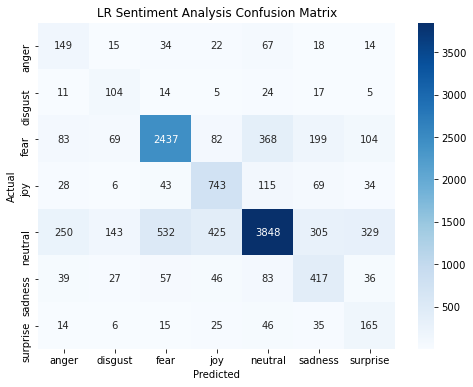

In [ ]:
# Sentiment Model Evaluation
print('First Sentiment Model:', lr_sentiment.best_params_)
y_pred_s = lr_sentiment.predict(X_test_s)

# Classification Report
print('\nLogistic Regression Sentiment Classification Report:')
print(classification_report(y_test_s, y_pred_s))

# Confusion Matrix with Visualization
cm_sentiment = confusion_matrix(y_test_s, y_pred_s)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sentiment, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lr_sentiment.classes_, yticklabels=lr_sentiment.classes_)
plt.title('LR Sentiment Analysis Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#####  【**II**】**XGBoost Sentiment Analysis Model**

Second Sentiment Model: {'clf__learning_rate': 0.3, 'clf__max_depth': 6, 'clf__n_estimators': 200, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}

XGBoost Sentiment Classification Report:
              precision    recall  f1-score   support

       anger       0.67      0.29      0.40       319
     disgust       0.73      0.24      0.36       180
        fear       0.81      0.77      0.79      3342
         joy       0.75      0.62      0.68      1038
     neutral       0.76      0.91      0.83      5832
     sadness       0.70      0.44      0.54       705
    surprise       0.83      0.31      0.45       306

    accuracy                           0.77     11722
   macro avg       0.75      0.51      0.58     11722
weighted avg       0.77      0.77      0.76     11722



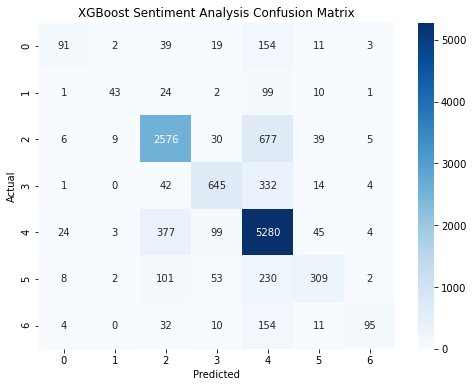

In [41]:
# XGBoost Sentiment Model Evaluation
print('Second Sentiment Model:', xb_sentiment.best_params_)
y_pred_s_enc = xb_sentiment.predict(X_test_s)

# Decode predictions back to original labels
y_pred_s = le.inverse_transform(y_pred_s_enc)

# Classification Report
print('\nXGBoost Sentiment Classification Report:')
print(classification_report(y_test_s, y_pred_s))

# Confusion Matrix with Visualization
cm_sentiment = confusion_matrix(y_test_s, y_pred_s)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sentiment, annot=True, fmt='d', cmap='Blues', 
            xticklabels=xb_sentiment.classes_, yticklabels=xb_sentiment.classes_)
plt.title('XGBoost Sentiment Analysis Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Sentiment Analysis Models Comparison**

- Model 1: **Logistic Regression**

  - Tuned parameters: C=10, max_features=5000, ngram_range=(1,1)

  - Accuracy: 67%

- Model 2: **XGBoost Classifier**

  - Tuned parameters: learning_rate=0.3, max_depth=6, n_estimators=200, max_features=5000, ngram_range=(1,1)

  - Accuracy: 77%

| Metric              | Logistic Regression | XGBoost |
| ------------------- | ------------------- | ------- |
| **Accuracy**        | 0.67                | 0.77    |
| **Macro Avg F1**    | 0.52                | 0.58    |
| **Weighted Avg F1** | 0.69                | 0.76    |

- Performance Insights by Class
  - Neutral & Fear are consistently well-predicted by both models.

  - XGBoost achieves excellent precision & recall for neutral (0.76 / 0.91) and fear (0.81 / 0.77).

  - Joy and Sadness perform moderately.

  - Anger, Disgust, and Surprise show low recall across both models — likely due to class imbalance or less distinctive language patterns.



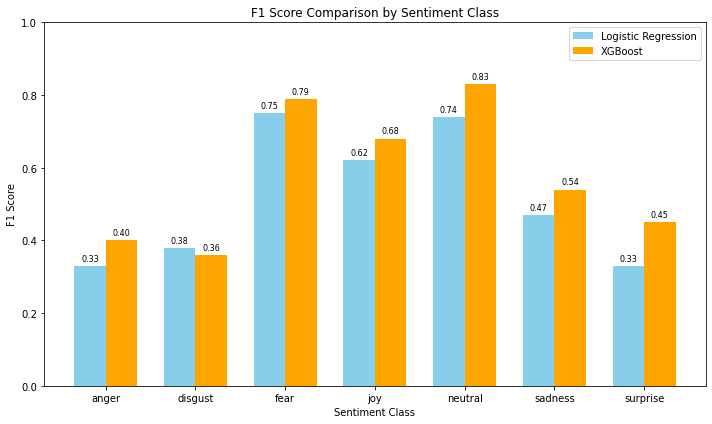

In [45]:
# Performance comparison for each class based on F1 score
# Sentiment classes
classes = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# F1-scores from classification reports
f1_lr = [0.33, 0.38, 0.75, 0.62, 0.74, 0.47, 0.33]
f1_xgb = [0.40, 0.36, 0.79, 0.68, 0.83, 0.54, 0.45]

# Bar chart setup
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, f1_lr, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, f1_xgb, width, label='XGBoost', color='orange')

# Add labels and title
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison by Sentiment Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars with F1 scores
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


#### **Save Sentiment Analysis Top Performing Model**

In [46]:
# Save both the model and label encoder
import joblib

# Save best estimator from grid search
joblib.dump(xb_sentiment.best_estimator_, 'xgb_sentiment_pipeline.pkl')

# Save the label encoder
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

### **Hate Speech Detection Models Evaluation**

##### 【**I**】 **RandomForest Hate Speech Detection Model**

First Hate Speech Model: {'clf__max_depth': 20, 'clf__n_estimators': 200, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 1)}

Random Forest Hate Speech Classification Report:
              precision    recall  f1-score   support

        Hate       0.91      0.25      0.39       497
    Not Hate       0.97      1.00      0.98     11225

    accuracy                           0.97     11722
   macro avg       0.94      0.63      0.69     11722
weighted avg       0.97      0.97      0.96     11722



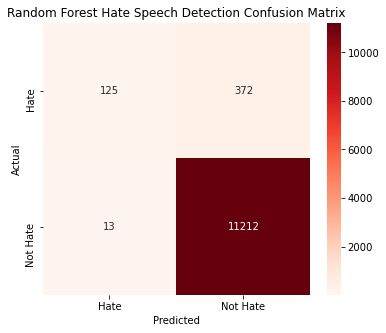

In [42]:
# Hate Speech Model Evaluation
print('First Hate Speech Model:', rf_hate.best_params_)
y_pred_h = rf_hate.predict(X_test_h)

# Classification Report
print('\nRandom Forest Hate Speech Classification Report:')
print(classification_report(y_test_h, y_pred_h))

# Confusion Matrix with Visualization
cm_hate = confusion_matrix(y_test_h, y_pred_h)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_hate, annot=True, fmt='d', cmap='Reds', 
            xticklabels=rf_hate.classes_, yticklabels=rf_hate.classes_)
plt.title('Random Forest Hate Speech Detection Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### 【**II**】 **Gradient Boosting (LightGBM) Hate Speech Detection Model**

Second Hate Speech Model: {'clf__learning_rate': 0.1, 'clf__max_depth': 20, 'clf__n_estimators': 200, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}

LightGBM Hate Speech Classification Report:
              precision    recall  f1-score   support

        Hate       0.37      0.79      0.51       497
    Not Hate       0.99      0.94      0.97     11225

    accuracy                           0.94     11722
   macro avg       0.68      0.87      0.74     11722
weighted avg       0.96      0.94      0.95     11722



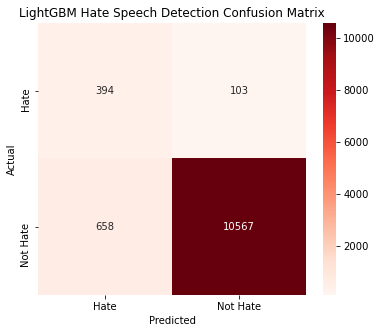

In [43]:
# Hate Speech Model Evaluation
print('Second Hate Speech Model:', lgb_hate.best_params_)
y_pred_h = lgb_hate.predict(X_test_h)

# Classification Report
print('\nLightGBM Hate Speech Classification Report:')
print(classification_report(y_test_h, y_pred_h))

# Confusion Matrix with Visualization
cm_hate = confusion_matrix(y_test_h, y_pred_h)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_hate, annot=True, fmt='d', cmap='Reds', 
            xticklabels=lgb_hate.classes_, yticklabels=lgb_hate.classes_)
plt.title('LightGBM Hate Speech Detection Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Hate Speech Detection Models Comparison**

 - Model 1: **Random Forest**
 - Best Parameters:

   - max_depth: 20

   - n_estimators: 200

   - tfidf__max_features: 3000

   - tfidf__ngram_range: (1,1)

 - Performance:

   - Hate Class Recall: 0.25 → Most hate cases were missed.

   - Not Hate Recall: 1.00 → Very strong at identifying non-hate speech.

   - Accuracy: 97%

   - Macro F1: 0.69 → Poor balance between classes.

**Main Issue**: Severely underperforms on the minority class (Hate), despite high overall accuracy.

 - Random Forest is biased toward the majority class (Not Hate), leading to poor recall for hate speech.

 - Model 2: **LightGBM**
 - Best Parameters:

   - learning_rate: 0.1

   - max_depth: 20

   - n_estimators: 200

   - tfidf__max_features: 5000

   - tfidf__ngram_range: (1,1)

 - Performance:

   - Hate Class Recall: 0.79 → Much better at catching hate speech.

   - Not Hate Recall: 0.94

   - Accuracy: 94%

   - Macro F1: 0.74 → Better balance between classes.

**Strength**: Handles class imbalance better and improves hate detection without sacrificing much accuracy.

 - LightGBM provides much better performance on the minority class (Hate), making it more suitable for this task.

 - Best/Preferred Model: **LightGBM**

 - We will use LightGBM for hate speech classification, especially since detecting hate speech (minority class) is our primary goal.

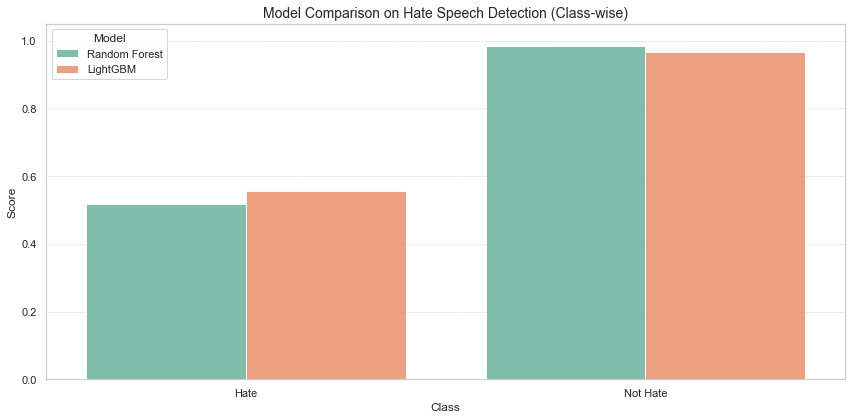

In [47]:
# Visual Comparison of the models performance on the two classes
# Set seaborn style
sns.set(style="whitegrid")

# Class names
classes = ['Hate', 'Not Hate']

# Performance metrics for each model (manually input from our reports)
# Format: [precision, recall, f1-score]
rf_scores = {
    'precision': [0.91, 0.97],
    'recall': [0.25, 1.00],
    'f1-score': [0.39, 0.98]
}

lgb_scores = {
    'precision': [0.37, 0.99],
    'recall': [0.79, 0.94],
    'f1-score': [0.51, 0.97]
}

# Create DataFrames
rf_df = pd.DataFrame(rf_scores, index=classes).reset_index().rename(columns={"index": "Class"})
lgb_df = pd.DataFrame(lgb_scores, index=classes).reset_index().rename(columns={"index": "Class"})

# Add model name
rf_df['Model'] = 'Random Forest'
lgb_df['Model'] = 'LightGBM'

# Combine both DataFrames
comparison_df = pd.concat([rf_df, lgb_df])

# Melt DataFrame for seaborn plotting
melted = comparison_df.melt(id_vars=['Class', 'Model'], var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Class', y='Score', hue='Model', ci=None, palette='Set2', dodge=True, alpha=0.9)
plt.title('Model Comparison on Hate Speech Detection (Class-wise)', fontsize=14)
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.legend(title='Model')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#### **Save Hate Speech Detection Top Performing Model**

In [50]:
# Save the full pipeline (TF-IDF + LightGBM)
joblib.dump(lgb_hate, 'lightgbm_hate_speech_model.pkl')


['lightgbm_hate_speech_model.pkl']

### **LIME**

We will use LIME to explain predictions for the best sentiment and hate speech models.

##### **LIME Sentiment Prediction**

In [48]:
# Install LIME
%pip install lime

import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

scikit-image 0.21.0 requires numpy>=1.21.1, but you'll have numpy 1.18.5 which is incompatible.
scikit-image 0.21.0 requires scipy>=1.8, but you'll have scipy 1.5.0 which is incompatible.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\judah\anaconda3\envs\learn-env\lib\site-packages (from lime) (3.3.1)

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283850 sha256=df65bab464f67db69783a521cd3d2de5b381b5f965e6bc2eb1f60489eafe532a
  Stored in directory: c:\users\judah\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5.1
    Uninstalling networkx-2.5.1:
      Successfully uninstalled networkx-2.5.1


In [51]:
# LIME Explanation for Sentiment Analysis using the XGBoost model(best model)
class_names_s = xb_sentiment.classes_
explainer_s = lime.lime_text.LimeTextExplainer(class_names=class_names_s)

# Create pipeline for LIME (sentiment)
pipeline_s = make_pipeline(xb_sentiment.best_estimator_.named_steps['tfidf'],
                           xb_sentiment.best_estimator_.named_steps['clf'])

# Explain a sentiment prediction
idx = 10  # Choose an index from test set
print('Document:', X_test_s.iloc[idx])
print('True class:', y_test_s.iloc[idx])
print('Predicted class:', xb_sentiment.predict([X_test_s.iloc[idx]])[0])

exp_s = explainer_s.explain_instance(X_test_s.iloc[idx], pipeline_s.predict_proba, num_features=10)
exp_s.show_in_notebook(text=True)

Document: seeing jesus investing holiness righteousness life youtube daum cafe repentance holiness youtube radio elijahs cry repentanceandholiness globalrepentancecall ukraine monkeypox styler weddingappliances holyappliances starbucks starbucksmd starbuckstumbler starbucksmug heavyrain dryer dishwasher everland lotteworld seoulland caribbeanbay everlandzoo russia floodedvehicle flooding monkeypox war russia floodedvehicle gangnam gangnamstation
True class: joy
Predicted class: 3


##### **LIME Explanation for Sentiment Prediction**
 - **Input Document**:
"seeing jesus investing holiness righteousness life youtube daum cafe repentance holiness youtube radio elijahs cry repentanceandholiness globalrepentancecall ukraine monkeypox styler weddingappliances holyappliances starbucks starbucksmd starbuckstumbler starbucksmug heavyrain dryer dishwasher everland lotteworld seoulland caribbeanbay everlandzoo russia floodedvehicle flooding monkeypox war russia floodedvehicle gangnam gangnamstation"

 -  **True Sentiment Label**: joy
 -  **Predicted Sentiment Class**: 3
**(Class 3 is actually JOY)**

| Class | Probability |
| ----- | ----------- |
| 3     | 0.91        |
| 4     | 0.03        |
| 5     | 0.03        |
| 0     | 0.02        |
| 1     | 0.01        |

 - The model is **highly confident (91%)** that this text expresses **joy**.

 - **Interpretation Summary**:
    - Even though the text includes seemingly negative or neutral terms like “monkeypox,” “war,” “flooding,” the model still predicted "joy" with high confidence.

    - This may be due to a dominance of positive/spiritual or uplifting words such as “jesus,” “holiness,” “repentance,” “life,” “wedding appliances,” and possibly “starbucks” and “everland” — which may be learned associations with joyful contexts in the training data.

    - LIME reveals that individual word contributions were low, so the model probably responded to the combined tone or semantics of the whole document rather than isolated keywords.

##### **LIME Hate Speech Detection**

In [53]:
# LIME Explanation for Hate Speech Detection
class_names_h = lgb_hate.classes_
explainer_h = lime.lime_text.LimeTextExplainer(class_names=class_names_h)

# Create pipeline for LIME (hate speech)
pipeline_h = make_pipeline(lgb_hate.best_estimator_.named_steps['tfidf'],
                           lgb_hate.best_estimator_.named_steps['clf'])

# Explain a hate speech prediction
idx_h = 15  # Choose an index from test set
print('Document:', X_test_h.iloc[idx_h])
print('True class:', y_test_h.iloc[idx_h])
print('Predicted class:', lgb_hate.predict([X_test_h.iloc[idx_h]])[0])

exp_h = explainer_h.explain_instance(X_test_h.iloc[idx_h], pipeline_h.predict_proba, num_features=10)
exp_h.show_in_notebook(text=True)

Document: beware monkey pox indonesian ministry health reported positive case monkeypox mpox indonesia together overcome challenge ensure public health maintained stay safe healthy mpox monkeypox ikatandokterindonesia staysafe
True class: Not Hate
Predicted class: Not Hate


##### **LIME Explanation for Sentiment Prediction**
 - **Input Document**:
   - "beware monkey pox indonesian ministry health reported positive case monkeypox mpox indonesia together overcome challenge ensure public health maintained stay safe healthy mpox monkeypox ikatandokterindonesia staysafe"
 - **Model Prediction**:
   - True Class: Not Hate

   - Predicted Class: Not Hate

 - (**Prediction is Correct**)
 - **Prediction Probabilities**:

 | Class    | Probability |
 | -------- | ----------- |
 | Hate     | **0.00**    |
 | Not Hate | **1.00**    |

 - The model **is very confident (100%)** that this is not hate speech.

 - **Interpretation Summary**:
   - LIME highlights the absence of offensive or hateful terms.

   - The message contains health awareness language, e.g., “stay safe”, “public health”, “reported case” — typically associated with public service or informational content.

   - This indicates the model is working as intended: detecting constructive health discourse and not misclassifying it due to potentially sensitive topics like “monkeypox”.

## 【**VII**】 **Conclusion**

This project aimed to analyze public discourse around the Mpox (Monkeypox) outbreak by developing machine learning models for sentiment classification and hate speech detection using social media data from Instagram. The dataset was drawn from posts related to Mpox, combining both emotional tone and public health content.

##### **Challenges & Limitations**:
1. **Class Imbalance**: Imbalanced class distribution led to lower recall in minority emotion categories.

2. **Language Scope**: Only English data was modeled due to data sparsity in other languages.

3. **Topic Sensitivity**: The overlap of public health discourse with potentially sensitive terms required careful handling to avoid false positives in hate speech detection.

##### **Recommendations**:

1. Deploy models for real-time monitoring of social media content
2. Implement continuous learning to adapt to evolving language patterns
3. Use model explanations for content moderation decisions
4. Monitor model performance across different languages and time periods

##### **Future Work**:

1. Experiment with transformer-based models (BERT, RoBERTa)
2. Implement ensemble methods for improved robustness
3. Add multilingual support for non-English content
4. Develop real-time prediction API